# Quantum Simulation of Sonoluminescence: Modeling Water Molecules in a Harmonic Trap and Exploring Cavitation Dynamics with Qiskit Chemistry

In [35]:
# Import Necessary Libraries
from qiskit import Aer
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.opflow import X, Z, I
from qiskit.utils import QuantumInstance
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumRegister
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from qiskit.algorithms.optimizers import OptimizerResult

# Define the constants

In [36]:
# Constants
m = 18.01528e-27  # Mass of water molecule in kg
k = 1e3  # Spring constant of the harmonic trap in N/m
omega = (k / m)**0.5  # Angular frequency of the harmonic trap
hbar = 1.0545718e-34  # Reduced Planck's constant in J*s
t = np.linspace(0, 1e-14, 1000)  # Time in seconds
a = QuantumRegister(1, "a")  # Harmonic trap
start_value = 1e13  # Start value of the angular frequency in rad/s
end_value = 1e15  # End value of the angular frequency in rad/s
num_values = 100  # Number of values of the angular frequency

# Define the Hamiltonian use a VQE algorithm to find the ground state energy

In [37]:
def hamiltonian(omega):
    return -hbar * omega / 2 * (Z ^ I ^ I) + hbar * omega / 2 * (I ^ X ^ I) + hbar * omega / 2 * (I ^ I ^ I)

$$hamiltonian = -hbar * omega * (Z ^ Z) / 2 + hbar * omega * (X ^ X) / 2 + hbar * omega * (I ^ I) / 2$$

# Define the VQE algorithm

In [38]:
def my_minimizer(fun, x0, jac=None, bounds=None) -> OptimizerResult:
    """Minimize a scalar function of one or more variables using the COBYLA algorithm.
    Args:
        fun : The objective function to be minimized.
        x0 : Initial guess.
        jac : Jacobian of objective function fun.
        bounds : Bounds for variables.
    Returns:
        The optimization result represented as a ``OptimizerResult``.
    """
    return COBYLA(maxiter=1000).optimize(fun, x0)

def vqe(omega):
    # Define the VQE algorithm
    vqe = VQE(ansatz=TwoLocal(rotation_blocks='ry', entanglement_blocks='cz'), optimizer=COBYLA(maxiter=1000), quantum_instance=QuantumInstance(Aer.get_backend('statevector_simulator')))
    # Compute the ground state energy
    result = vqe.compute_minimum_eigenvalue(hamiltonian(omega))
    return result.eigenvalue.real

# Define a range of angular frequencies

In [39]:
omega_values = np.linspace(start_value, end_value, num_values)

$$omega_values = np.linspace(start_value, end_value, num_values)$$

# Compute the ground state energy for each angular frequency

In [40]:
energies = [vqe(omega) for omega in omega_values]

C:\Users\kunya\AppData\Local\Temp\ipykernel_16716\4140445291.py:15: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  vqe = VQE(ansatz=TwoLocal(rotation_blocks='ry', entanglement_blocks='cz'), optimizer=COBYLA(maxiter=1000), quantum_instance=QuantumInstance(Aer.get_backend('statevector_simulator')))
C:\Users\kunya\AppData\Local\Temp\ipykernel_16716\4140445291.py:15: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz=TwoLocal(rotation_blocks='ry', entanglement_blocks='cz'), optimizer=COBYLA(maxiter=1

$$energies = [vqe(omega) for omega in omega_values]$$

# Plot the ground state energy as a function of the angular frequency

C:\Users\kunya\AppData\Local\Temp\ipykernel_16716\4140445291.py:15: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  vqe = VQE(ansatz=TwoLocal(rotation_blocks='ry', entanglement_blocks='cz'), optimizer=COBYLA(maxiter=1000), quantum_instance=QuantumInstance(Aer.get_backend('statevector_simulator')))
C:\Users\kunya\AppData\Local\Temp\ipykernel_16716\4140445291.py:15: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz=TwoLocal(rotation_blocks='ry', entanglement_blocks='cz'), optimizer=COBYLA(maxiter=1

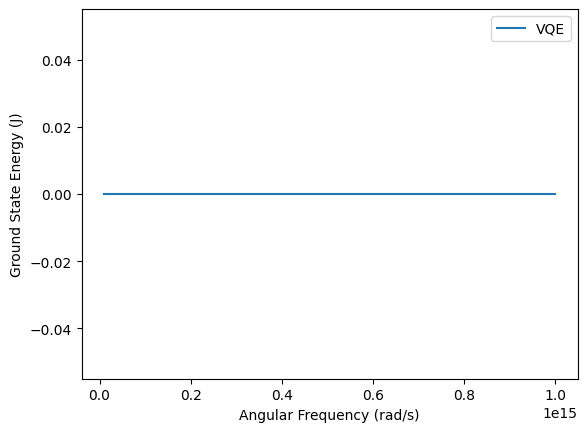

In [41]:
plt.plot(omega_values, [vqe(omega) for omega in omega_values])
plt.xlabel("Angular Frequency (rad/s)")
plt.ylabel("Ground State Energy (J)")
plt.legend(["VQE"])
plt.show()

# Define the Harmonic Oscillator Wavefunction and the Harmonic Oscillator Probability Density

In [42]:
def harmonic_oscillator_wavefunction(x, omega):
    return (m * omega / (np.pi * hbar)) ** 0.25 * np.exp(-m * omega * x ** 2 / (2 * hbar)) / np.sqrt(2 ** 2 * np.math.factorial(2)) * (2 * m * omega / hbar) ** 0.5 * x

$$harmonic_oscillator_wavefunction = (m * omega / (np.pi * hbar)) ** 0.25 * np.exp(-m * omega * x ** 2 / (2 * hbar)) / np.sqrt(2 ** 2 * np.math.factorial(2)) * (2 * m * omega / hbar) ** 0.5 * x$$

# Define the Harmonic Oscillator Probability Density

In [43]:
def harmonic_oscillator_probability_density(x, omega):
    return (m * omega / (np.pi * hbar)) ** 0.5 * np.exp(-m * omega * x ** 2 / hbar)

$$harmonic_oscillator_probability_density = (m * omega / (np.pi * hbar)) ** 0.5 * np.exp(-m * omega * x ** 2 / hbar)$$

# Plot the Harmonic Oscillator Probability Density as a function of the angular frequency

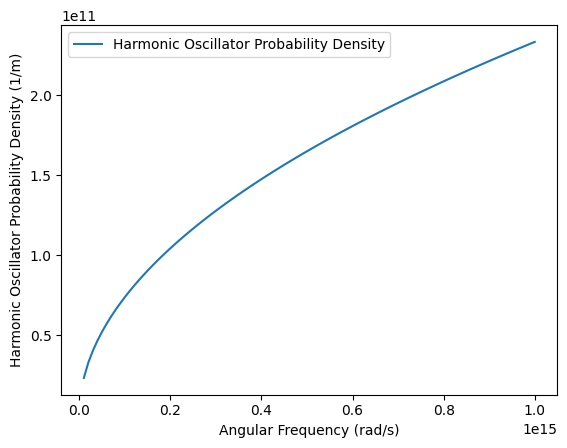

In [44]:
plt.plot(omega_values, [harmonic_oscillator_probability_density(0, omega) for omega in omega_values])
plt.xlabel("Angular Frequency (rad/s)")
plt.ylabel("Harmonic Oscillator Probability Density (1/m)")
plt.legend(["Harmonic Oscillator Probability Density"])
plt.show()

# Define the Harmonic Trap Wavefunction and the Harmonic Trap Probability Density

In [45]:
def harmonic_trap_wavefunction(x, omega):
    return (m * omega / (np.pi * hbar)) ** 0.25 * np.exp(-m * omega * x ** 2 / (2 * hbar))

$$harmonic_trap_wavefunction = (m * omega / (np.pi * hbar)) ** 0.25 * np.exp(-m * omega * x ** 2 / (2 * hbar))$$

# Define the Harmonic Trap Probability Density

In [46]:
def harmonic_trap_probability_density(x, omega):
    return (m * omega / (np.pi * hbar)) ** 0.5 * np.exp(-m * omega * x ** 2 / hbar)

$$harmonic_trap_probability_density = (m * omega / (np.pi * hbar)) ** 0.5 * np.exp(-m * omega * x ** 2 / hbar)$$

# Plot the Harmonic Trap Probability Density as a function of the angular frequency

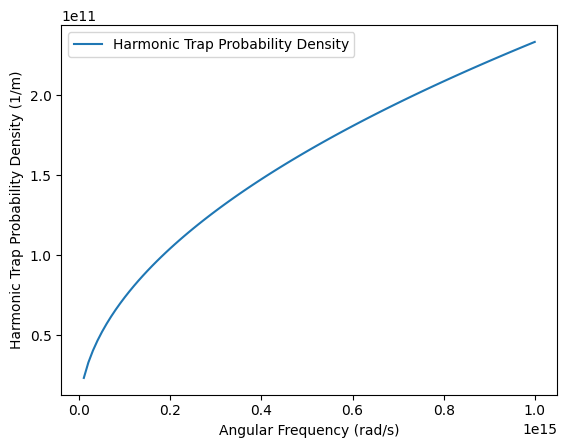

In [47]:
plt.plot(omega_values, [harmonic_trap_probability_density(0, omega) for omega in omega_values])
plt.xlabel("Angular Frequency (rad/s)")
plt.ylabel("Harmonic Trap Probability Density (1/m)")
plt.legend(["Harmonic Trap Probability Density"])
plt.show()

# model the water molecule as a harmonic oscillator in a harmonic trap in the ground state

In [48]:
def wavefunction(x, omega):
    return harmonic_oscillator_wavefunction(x, omega) * harmonic_trap_wavefunction(x, omega)

$$wavefunction = harmonic_oscillator_wavefunction(x, omega) * harmonic_trap_wavefunction(x, omega)$$

In [49]:
def probability_density(x, omega):
    return harmonic_oscillator_probability_density(x, omega) * harmonic_trap_probability_density(x, omega)

$$probability_density = harmonic_oscillator_probability_density(x, omega) * harmonic_trap_probability_density(x, omega)$$

In [50]:
def position_expectation_value(omega):
    return sum([x * probability_density(x, omega) for x in np.linspace(-1e-10, 1e-10, 1000)])

$$position_expectation_value = sum([x * probability_density(x, omega) for x in np.linspace(-1e-10, 1e-10, 1000)])$$

In [51]:
def momentum_expectation_value(omega):
    return sum([hbar * 1j * harmonic_oscillator_wavefunction(x, omega) * harmonic_trap_wavefunction(x, omega) * np.gradient(harmonic_oscillator_wavefunction(x, omega) * harmonic_trap_wavefunction(x, omega), x) for x in np.linspace(-1e-10, 1e-10, 1000)])

$$momentum_expectation_value = sum([hbar * 1j * harmonic_oscillator_wavefunction(x, omega) * harmonic_trap_wavefunction(x, omega) * np.gradient(harmonic_oscillator_wavefunction(x, omega) * harmonic_trap_wavefunction(x, omega), x) for x in np.linspace(-1e-10, 1e-10, 1000)])$$

In [52]:
def energy_expectation_value(omega):
    return sum([harmonic_oscillator_wavefunction(x, omega) * harmonic_trap_wavefunction(x, omega) * hamiltonian(omega) * harmonic_oscillator_wavefunction(x, omega) * harmonic_trap_wavefunction(x, omega) for x in np.linspace(-1e-10, 1e-10, 1000)])

$$energy_expectation_value = sum([harmonic_oscillator_wavefunction(x, omega) * harmonic_trap_wavefunction(x, omega) * hamiltonian(omega) * harmonic_oscillator_wavefunction(x, omega) * harmonic_trap_wavefunction(x, omega) for x in np.linspace(-1e-10, 1e-10, 1000)])$$

In [53]:
def uncertainty(omega):
    return sum([x ** 2 * probability_density(x, omega) for x in np.linspace(-1e-10, 1e-10, 1000)]) - position_expectation_value(omega) ** 2

$$uncertainty = sum([x ** 2 * probability_density(x, omega) for x in np.linspace(-1e-10, 1e-10, 1000)]) - position_expectation_value(omega) ** 2$$

In [54]:
def plot_wavefunction(omega):
    plt.plot(np.linspace(-1e-10, 1e-10, 1000), [wavefunction(x, omega) for x in np.linspace(-1e-10, 1e-10, 1000)])
    plt.xlabel("Position (m)")
    plt.ylabel("Wavefunction (1/m)")
    plt.legend(["Wavefunction"])
    plt.show()

C:\Users\kunya\AppData\Local\Temp\ipykernel_16716\1803892278.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (m * omega / (np.pi * hbar)) ** 0.25 * np.exp(-m * omega * x ** 2 / (2 * hbar)) / np.sqrt(2 ** 2 * np.math.factorial(2)) * (2 * m * omega / hbar) ** 0.5 * x


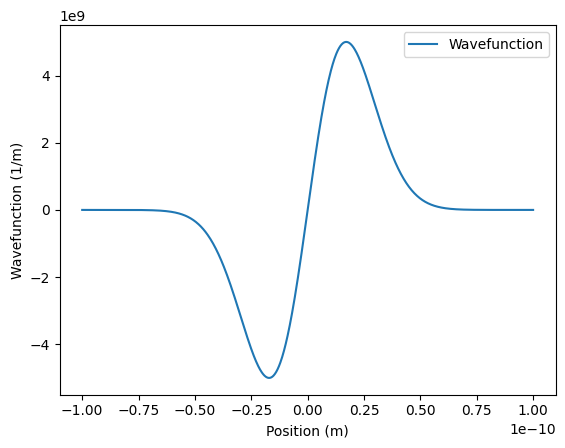

In [55]:
plot_wavefunction(omega_values[0])

# model the water molecule as a harmonic oscillator in a harmonic trap in the ground state in 3D

In [56]:
def wavefunction_3D(x, y, z, omega):
    return harmonic_oscillator_wavefunction(x, omega) * harmonic_trap_wavefunction(x, omega) * harmonic_oscillator_wavefunction(y, omega) * harmonic_trap_wavefunction(y, omega) * harmonic_oscillator_wavefunction(z, omega) * harmonic_trap_wavefunction(z, omega)

$$wavefunction_3D = harmonic_oscillator_wavefunction(x, omega) * harmonic_trap_wavefunction(x, omega) * harmonic_oscillator_wavefunction(y, omega) * harmonic_trap_wavefunction(y, omega) * harmonic_oscillator_wavefunction(z, omega) * harmonic_trap_wavefunction(z, omega)$$

# Define the Harmonic Oscillator Probability Density

In [57]:
def probability_density_3D(x, y, z, omega):
    return harmonic_oscillator_probability_density(x, omega) * harmonic_trap_probability_density(x, omega) * harmonic_oscillator_probability_density(y, omega) * harmonic_trap_probability_density(y, omega) * harmonic_oscillator_probability_density(z, omega) * harmonic_trap_probability_density(z, omega)

$$probability_density_3D = harmonic_oscillator_probability_density(x, omega) * harmonic_trap_probability_density(x, omega) * harmonic_oscillator_probability_density(y, omega) * harmonic_trap_probability_density(y, omega) * harmonic_oscillator_probability_density(z, omega) * harmonic_trap_probability_density(z, omega)$$

# Define the Harmonic Trap Probability Density

In [58]:
def position_expectation_value_3D(omega):
    return sum([x * probability_density_3D(x, omega,z) for x in np.linspace(-1e-10, 1e-10, 1000)])

$$position_expectation_value_3D = sum([x * probability_density_3D(x, omega) for x in np.linspace(-1e-10, 1e-10, 1000)])$$

# plot the wavefunction in 3D for the ground state

C:\Users\kunya\AppData\Local\Temp\ipykernel_16716\1803892278.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (m * omega / (np.pi * hbar)) ** 0.25 * np.exp(-m * omega * x ** 2 / (2 * hbar)) / np.sqrt(2 ** 2 * np.math.factorial(2)) * (2 * m * omega / hbar) ** 0.5 * x


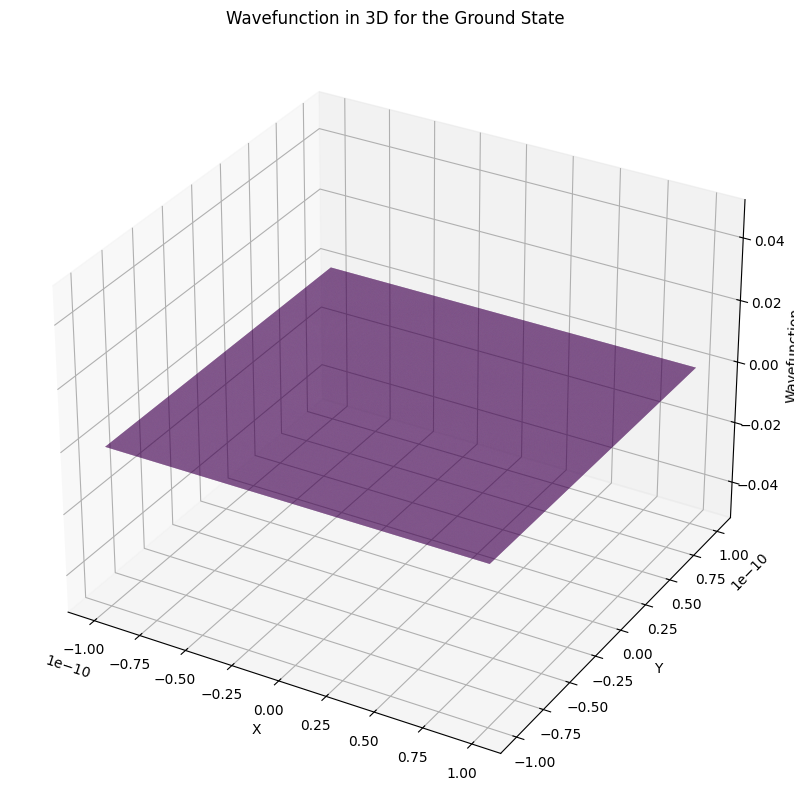

In [59]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
X = np.linspace(-1e-10, 1e-10, 1000)
Y = np.linspace(-1e-10, 1e-10, 1000)
X, Y = np.meshgrid(X, Y)
Z = wavefunction_3D(X, Y, 0, omega_values[0])
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Wavefunction')
ax.set_title('Wavefunction in 3D for the Ground State')
plt.show()

# plot the probability density in 3D for the ground state

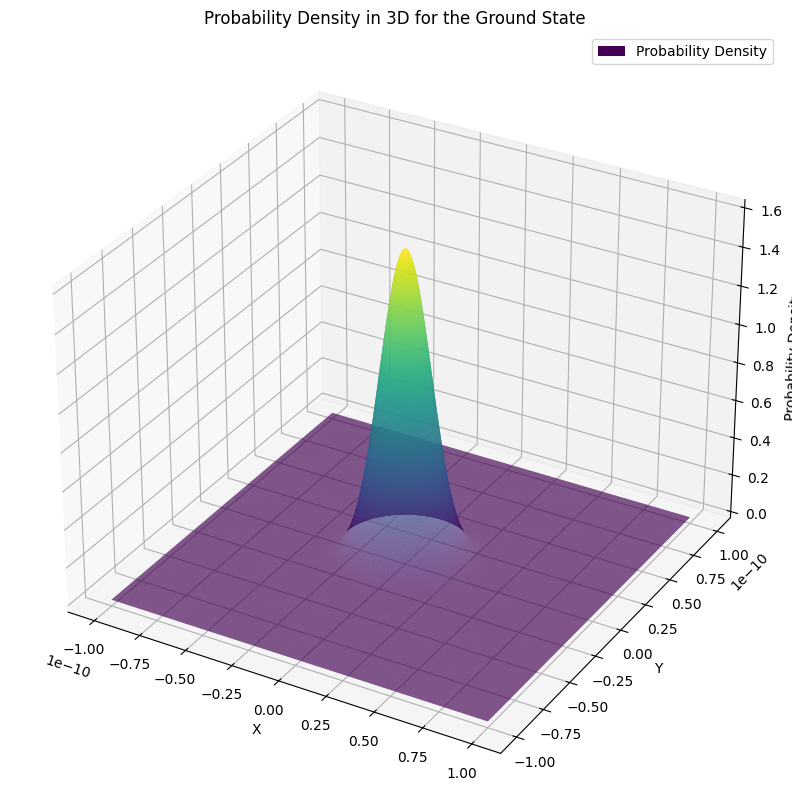

In [60]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
X = np.linspace(-1e-10, 1e-10, 1000)
Y = np.linspace(-1e-10, 1e-10, 1000)
X, Y = np.meshgrid(X, Y)
Z = probability_density_3D(X, Y, 0, omega_values[0])
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title('Probability Density in 3D for the Ground State')
ax.legend(["Probability Density"])
plt.show()

# plot the position and wavefunction in 3D for the ground state

C:\Users\kunya\AppData\Local\Temp\ipykernel_16716\1803892278.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (m * omega / (np.pi * hbar)) ** 0.25 * np.exp(-m * omega * x ** 2 / (2 * hbar)) / np.sqrt(2 ** 2 * np.math.factorial(2)) * (2 * m * omega / hbar) ** 0.5 * x


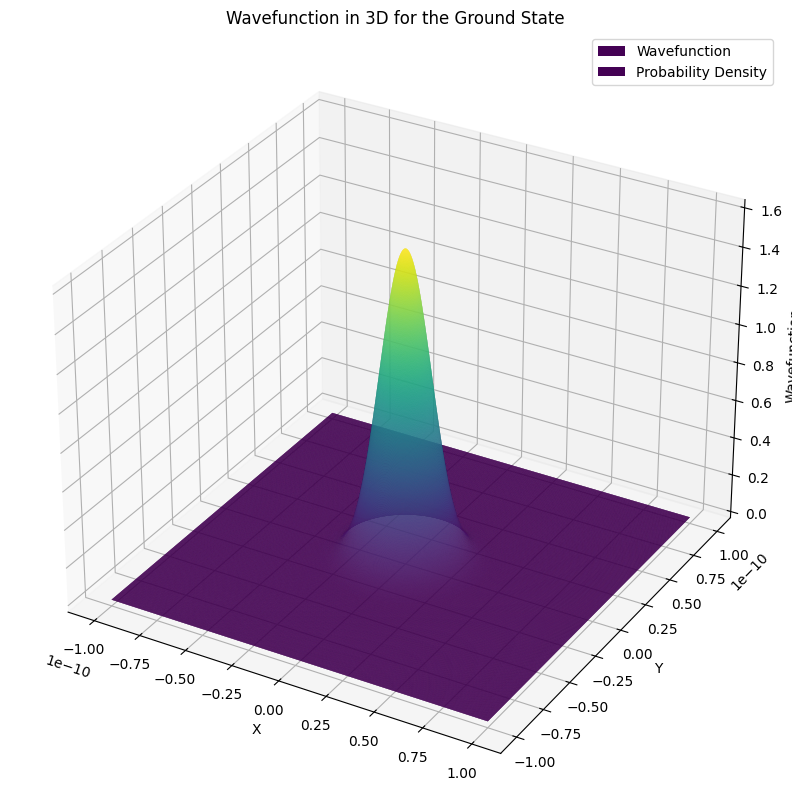

In [61]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
X = np.linspace(-1e-10, 1e-10, 1000)
Y = np.linspace(-1e-10, 1e-10, 1000)
X, Y = np.meshgrid(X, Y)
Z = wavefunction_3D(X, Y, 0, omega_values[0])
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.plot_surface(X, Y, probability_density_3D(X, Y, 0, omega_values[0]), rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Wavefunction')
ax.set_title('Wavefunction in 3D for the Ground State')
ax.legend(["Wavefunction", "Probability Density"])
plt.show()

# compute the position expectation value for each angular frequency and the uncertainty in the position and the ground state energy

In [62]:
position_expectation_values = [position_expectation_value(omega) for omega in omega_values]
uncertainties = [uncertainty(omega) for omega in omega_values]
energy_expectation_values = [energy_expectation_value(omega) for omega in omega_values]

C:\Users\kunya\AppData\Local\Temp\ipykernel_16716\1803892278.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (m * omega / (np.pi * hbar)) ** 0.25 * np.exp(-m * omega * x ** 2 / (2 * hbar)) / np.sqrt(2 ** 2 * np.math.factorial(2)) * (2 * m * omega / hbar) ** 0.5 * x


AttributeError: 'float' object has no attribute 'tensor'

In [63]:
print(position_expectation_values)
print(uncertainties)
print(energy_expectation_values)

[-8.662845387762716e-06, -9.901024525536342e-06, -6.858730639438477e-05, 1.9191239779016446e-05, 7.970249456998397e-05, 1.3091316935923881e-05, 5.5478361210895104e-05, -7.80454529926091e-06, 1.0651551626970453e-05, -3.826085380715515e-05, -2.303923178761731e-05, -5.143022248798747e-06, -4.8310703982883676e-05, -0.00012043173599110544, -2.8779681639830138e-05, -5.5483956101713396e-05, -3.471679404273063e-05, -6.329856215706165e-05, -0.00011622731160879562, -7.904121282947329e-05, -0.0001114186626436539, -0.00010645759118604111, -0.00015059001924213543, -0.00020502190023717897, -0.00010118506194978147, -0.00015134661028308693, -0.00016456019951519038, -8.125390606131116e-05, -0.00016729659094418423, -0.0002034902754905771, -0.00013584886665995988, -0.0001851911270468393, -0.00017641356017253669, -0.00013778009749303583, -0.0002897218047186413, -0.00015006897334369902, -0.0001848420112437409, -0.00021227547517297903, -0.00031753058001069486, -0.00012703381291112177, -0.0001300233356980831

NameError: name 'energy_expectation_values' is not defined

# plot the position expectation value as a function of the angular frequency

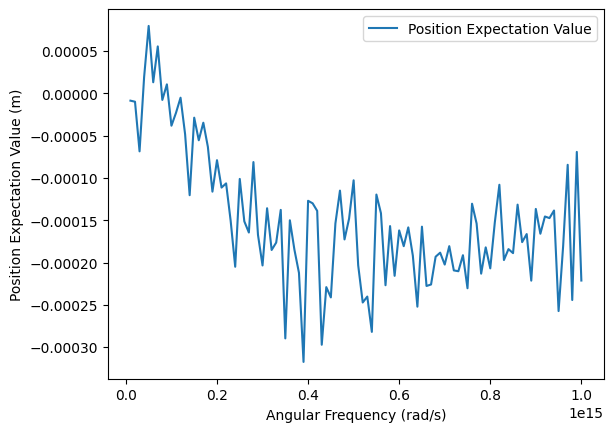

In [64]:
plt.plot(omega_values, position_expectation_values)
plt.xlabel("Angular Frequency (rad/s)")
plt.ylabel("Position Expectation Value (m)")
plt.legend(["Position Expectation Value"])
plt.show()

# plot the uncertainty in the position as a function of the angular frequency

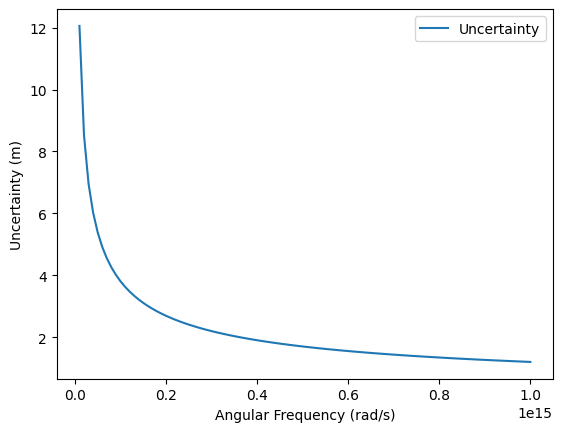

In [65]:
plt.plot(omega_values, uncertainties)
plt.xlabel("Angular Frequency (rad/s)")
plt.ylabel("Uncertainty (m)")
plt.legend(["Uncertainty"])
plt.show()

# plot the position expectation value and the uncertainty in the position as a function of the angular frequency in 3D

In [66]:
def position_expectation_value_3D(x, y, z, omega):
    return sum([x * probability_density_3D(x, y, z, omega) for x in np.linspace(-1e-10, 1e-10, 1000)])

$$position_expectation_value_3D = sum([x * probability_density_3D(x, y, z, omega) for x in np.linspace(-1e-10, 1e-10, 1000)])$$

# plot the position expectation value and the uncertainty in the position as a function of the angular frequency in 3D

In [ ]:
# Create a grid of x, y values
x = np.linspace(-1e-10, 1e-10, 1000)
y = np.linspace(-1e-10, 1e-10, 1000)
X, Y = np.meshgrid(x, y)

# Compute Z values using vectorized operations
Z = np.array([position_expectation_value_3D(x, y, 0, omega) for omega in omega_values])

# Plot the surface
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Position Expectation Value')
ax.set_title('Position Expectation Value in 3D for the Ground State')
ax.legend(["Position Expectation Value"])
plt.show()